In [69]:
import tensorflow as tf
import numpy as np 
import pandas as pd

In [70]:
df=pd.read_csv('stroke-data.csv')

In [71]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


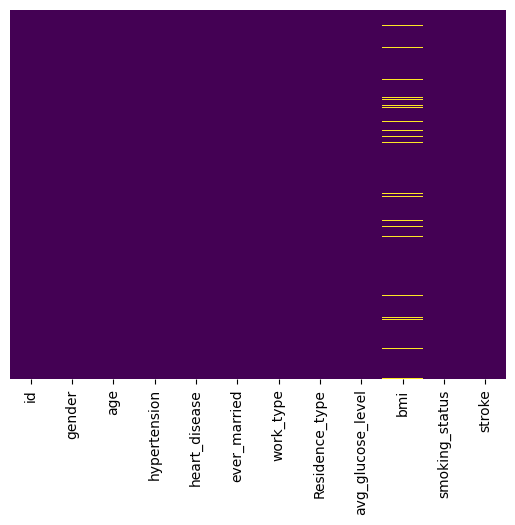

In [73]:
import seaborn as sns
#make heatmap of null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#print number of rows with null values
print(df.isnull().sum())

>Check unique values for categorical features

In [74]:
columns=["smoking_status","work_type","Residence_type","ever_married","gender"]
#check number of unique vaues for each column
df.dropna(inplace=True)
for col in columns:
    print(col,df[col].nunique())

#one hot encoding for categorical columns to numerical values nnot true false

df=pd.get_dummies(df,columns=columns,dtype=int)

smoking_status 4
work_type 5
Residence_type 2
ever_married 2
gender 3


In [75]:
from sklearn.model_selection import train_test_split

X=df.drop(['stroke'],axis=1)

y=df['stroke']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [77]:
#make sequential model for prediction
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))


In [78]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [79]:
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
108/108 [==============================] - 2s 11ms/step - loss: 22.6551 - accuracy: 0.9153 - val_loss: 15.8781 - val_accuracy: 0.9511
Epoch 2/100
108/108 [==============================] - 1s 8ms/step - loss: 10.0819 - accuracy: 0.9243 - val_loss: 0.8747 - val_accuracy: 0.9117
Epoch 3/100
108/108 [==============================] - 1s 8ms/step - loss: 10.9054 - accuracy: 0.9139 - val_loss: 16.1987 - val_accuracy: 0.9511
Epoch 4/100
108/108 [==============================] - 1s 7ms/step - loss: 11.0148 - accuracy: 0.9095 - val_loss: 29.6335 - val_accuracy: 0.9511
Epoch 5/100
108/108 [==============================] - 1s 8ms/step - loss: 10.3307 - accuracy: 0.9211 - val_loss: 13.9657 - val_accuracy: 0.9511
Epoch 6/100
108/108 [==============================] - 1s 12ms/step - loss: 6.1393 - accuracy: 0.9173 - val_loss: 9.5077 - val_accuracy: 0.9511
Epoch 7/100
108/108 [==============================] - 1s 9ms/step - loss: 6.4887 - accuracy: 0.9226 - val_loss: 5.7839 - val_accur

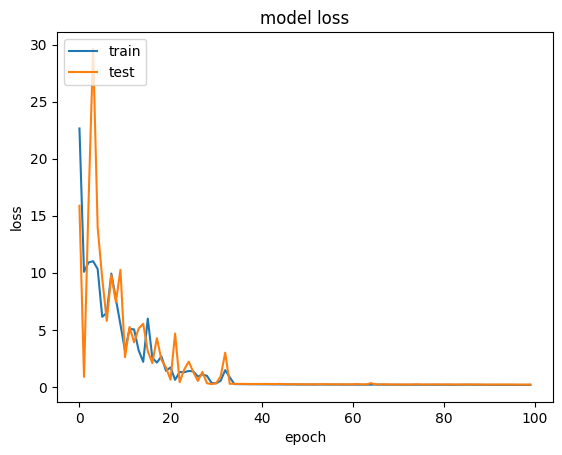

In [80]:
#plot loss and accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

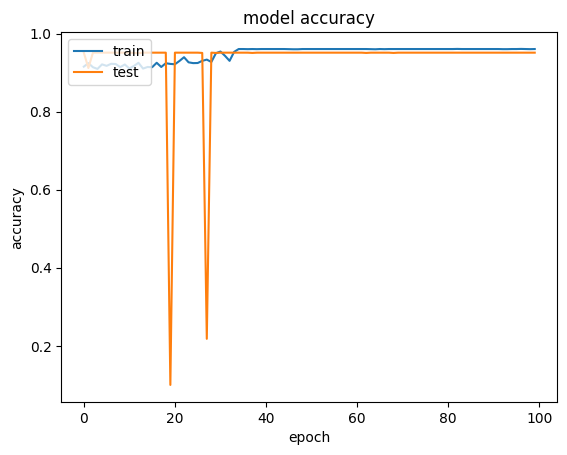

In [81]:
#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
